In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

### Importing and understanding the data

In [6]:
data = pd.read_csv('Salary_dataset.csv', index_col=0)

In [7]:
data.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 720.0 bytes


In [75]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

We can see that our data consists of two metrics: years of work experience and salary. Each has 30 values, so this dataset is really small.

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

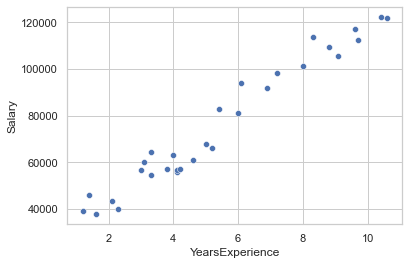

In [64]:
sns.scatterplot(x=data['YearsExperience'], y=data['Salary'])

### Test-train-split and model training

From scatter plot above we can clearly see linear dependence in our data. We can use linear regression in this dataset.

In [21]:
X = data.iloc[:, :-1].values 
y = data.iloc[:, -1].values

(30, 1)

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
model = LinearRegression()

In [17]:
model.fit(X_train, y_train)

LinearRegression()

### Prediction, error estimates and accuracy of model

In [63]:
predictions = model.predict(X_test)
for index in range(len(predictions)):
    print('predicted: ',round(predictions[index]),' actual: ',  y_test[index])

predicted:  115815  actual:  112636.0
predicted:  71513  actual:  67939.0
predicted:  102619  actual:  113813.0
predicted:  75283  actual:  83089.0
predicted:  55489  actual:  64446.0
predicted:  60202  actual:  57190.0
predicted:  122414  actual:  122392.0
predicted:  107332  actual:  109432.0
predicted:  63029  actual:  56958.0
predicted:  35694  actual:  39344.0


Text(0, 0.5, 'Salary')

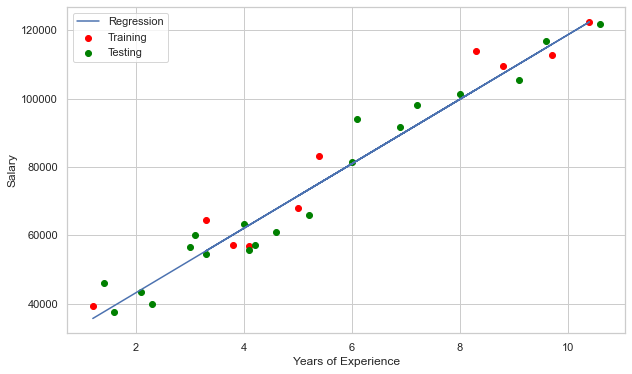

In [79]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='red', label='Training')
plt.scatter(X_train, y_train, color='green', label='Testing')
plt.plot(X_test, predictions, label='Regression')
plt.legend()
plt.xlabel("Years of Experience")
plt.ylabel("Salary")

In [67]:
print('Coefficient: ', model.coef_)
print('Intercept: ', model.intercept_)

Coefficient:  [9426.03876907]
Intercept:  24382.731502336814


In [66]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
 
mae = mean_absolute_error(y_true=y_test,y_pred=predictions)
mse = mean_squared_error(y_true=y_test,y_pred=predictions) 
rmse = mean_squared_error(y_true=y_test,y_pred=predictions,squared=False)
accuracy = model.score(X_test, y_test)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)
print('R-squared: ', accuracy)

MAE: 4956.523261444907
MSE: 35301898.887134835
RMSE: 5941.540110706553
R-squared:  0.9553063138044949
